# Workshop5. Линейная регрессия. (33 балла)

> Линейная регрессия - это не повод для затяжной депрессии.

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

### Полезная литература

- [Первый конспект лекции про линейную регрессию из курса ФШЭ](https://github.com/esokolov/ml-course-hse/blob/master/2016-fall/lecture-notes/lecture02-linregr.pdf)
- [Второй конспект лекции про линейную регрессию из курса ФШЭ](https://github.com/esokolov/ml-course-hse/blob/master/2016-fall/lecture-notes/lecture03-linregr.pdf)
- [Теория из курса ODS](https://github.com/Yorko/mlcourse_open/blob/master/jupyter_notebooks/topic04_linear_models/topic4_linear_models_part1_mse_likelihood_bias_variance.ipynb)
- [Материалы из курса от МФТИ](https://www.coursera.org/specializations/machine-learning-data-analysis)
- [Статья про лин.рег. от ODS на habrahabr](https://habrahabr.ru/company/ods/blog/323890/)

## Данные

Возьмем датасет о стоимости домов: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data.

```
SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
MSSubClass: The building class
MSZoning: The general zoning classification
LotFrontage: Linear feet of street connected to property
LotArea: Lot size in square feet
Street: Type of road access
Alley: Type of alley access
LotShape: General shape of property
LandContour: Flatness of the property
Utilities: Type of utilities available
LotConfig: Lot configuration
LandSlope: Slope of property
Neighborhood: Physical locations within Ames city limits
Condition1: Proximity to main road or railroad
Condition2: Proximity to main road or railroad (if a second is present)
BldgType: Type of dwelling
HouseStyle: Style of dwelling
OverallQual: Overall material and finish quality
OverallCond: Overall condition rating
YearBuilt: Original construction date
YearRemodAdd: Remodel date
RoofStyle: Type of roof
RoofMatl: Roof material
Exterior1st: Exterior covering on house
Exterior2nd: Exterior covering on house (if more than one material)
MasVnrType: Masonry veneer type
MasVnrArea: Masonry veneer area in square feet
ExterQual: Exterior material quality
ExterCond: Present condition of the material on the exterior
Foundation: Type of foundation
BsmtQual: Height of the basement
BsmtCond: General condition of the basement
BsmtExposure: Walkout or garden level basement walls
BsmtFinType1: Quality of basement finished area
BsmtFinSF1: Type 1 finished square feet
BsmtFinType2: Quality of second finished area (if present)
BsmtFinSF2: Type 2 finished square feet
BsmtUnfSF: Unfinished square feet of basement area
TotalBsmtSF: Total square feet of basement area
Heating: Type of heating
HeatingQC: Heating quality and condition
CentralAir: Central air conditioning
Electrical: Electrical system
1stFlrSF: First Floor square feet
2ndFlrSF: Second floor square feet
LowQualFinSF: Low quality finished square feet (all floors)
GrLivArea: Above grade (ground) living area square feet
BsmtFullBath: Basement full bathrooms
BsmtHalfBath: Basement half bathrooms
FullBath: Full bathrooms above grade
HalfBath: Half baths above grade
Bedroom: Number of bedrooms above basement level
Kitchen: Number of kitchens
KitchenQual: Kitchen quality
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
Functional: Home functionality rating
Fireplaces: Number of fireplaces
FireplaceQu: Fireplace quality
GarageType: Garage location
GarageYrBlt: Year garage was built
GarageFinish: Interior finish of the garage
GarageCars: Size of garage in car capacity
GarageArea: Size of garage in square feet
GarageQual: Garage quality
GarageCond: Garage condition
PavedDrive: Paved driveway
WoodDeckSF: Wood deck area in square feet
OpenPorchSF: Open porch area in square feet
EnclosedPorch: Enclosed porch area in square feet
3SsnPorch: Three season porch area in square feet
ScreenPorch: Screen porch area in square feet
PoolArea: Pool area in square feet
PoolQC: Pool quality
Fence: Fence quality
MiscFeature: Miscellaneous feature not covered in other categories
MiscVal: $Value of miscellaneous feature
MoSold: Month Sold
YrSold: Year Sold
SaleType: Type of sale
SaleCondition: Condition of sale
```

Целевой переменной будет `SalePrice`. То есть мы будем предсказывать стоимость жилья на основе его характеристик. Это задание будет не то чтобы про линейную регрессию, но про попытку построить модель для предсказания цен на дом. В принципе я бы мог еще добавить заданий на более тщательный отбор признаков, логарифмирование признаков, у которых сильное смещение "скоса"(skew). Можно было бы анализировать и выпрямлять распределение целевой переменной. Можно было бы генерировать новые признаки из существующих, строить ансамбли моделей. Но мы ограничимся, пока что.......

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('../data/house_prices.csv.gz', index_col='Id')
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
assert df.shape == (1460, 80)

In [4]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

## 1.0 Анализ целевого признака (3 балла)

Удостоверимся, что раcпределение целевого признака "хорошее", без странных выбросов. В идеале мы хотим видеть нормальное распределени или достаточно похожее на него, без очень длинных "хвостов" выбросов.

_Почему требуется нормальность распределения: ищите объяснения линейной регресси через алгоритмы максимизации правдоподобия. В итоге, грубо говоря, суть сводится к тому, что с ростом объема выборки, оценка максимального правдоподобия лучше описывает нормальное распределение._

[Коэффициент эксцесса](http://www.machinelearning.ru/wiki/index.php?title=%D0%9A%D0%BE%D1%8D%D1%84%D1%84%D0%B8%D1%86%D0%B8%D0%B5%D0%BD%D1%82_%D1%8D%D0%BA%D1%81%D1%86%D0%B5%D1%81%D1%81%D0%B0) показывает степень остроты пика распределения случайной величины. Для нормального распределения он равен `0`. Если хвосты распределения «тяжелее», а пик более «приплюснутый», чем у нормального распределения, то коэффициент < 0. А если хвосты легкие, то больше 0. В нашем случае должно получиться околов `6.5`.

Задание: 
- Нарисуйте график распределения `SalePrice`, используйте аргумент `fit=scipy.stats.norm`, чтобы нарисовать предполагаемое нормальное распределение. Напечатайте значение коэффициент эксцесса `kurtosis` для этого признака.
- Нарисуйте график [scipy.stats.probplot](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.probplot.html) - он покажет нам реальные квантили выборки и теоретические. По нему можно видеть, на сколько много выьросов и на сколько выборка предсказуема.
- Что вы можете сказать по поводу выборки основываясь на `probplot`.  [wiki](https://en.wikipedia.org/wiki/Normal_probability_plot)

        По графику probplot можно судить о том, насколько выборка отклоняется от нормального распределения.   Есть значительные отклонения от прямой, это может указывать на наличие выбросов или других аномалий в данных.

C:\Users\Алёна\AppData\Roaming\Python\Python311\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


6.509812011089439

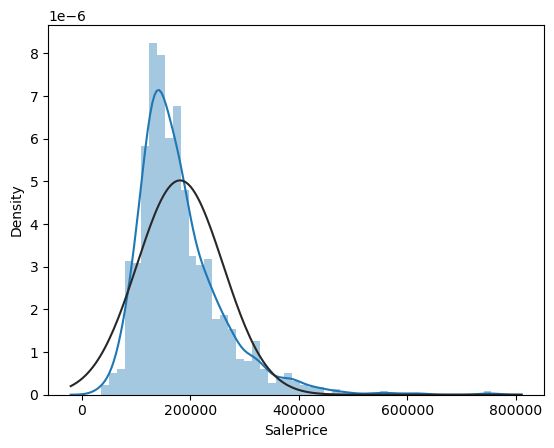

In [5]:
import scipy.stats as stats
import matplotlib.pyplot as plt

sns.distplot(df['SalePrice'], fit=stats.norm)
plt.xlabel('SalePrice')
plt.ylabel('Density')

kurtosis = stats.kurtosis(df['SalePrice'])
kurtosis

Text(0.5, 1.0, 'Probability Plot of SalePrice')

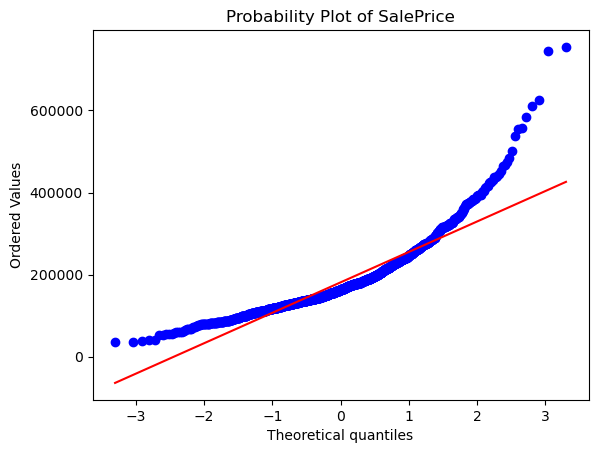

In [6]:
stats.probplot(df['SalePrice'], plot=plt)
plt.title('Probability Plot of SalePrice')

## 1.2 Анализ некоторых зависимостей (3 балла)

У нас очень много разных признаков. Любопытно построить разные графики. Позаботьтесь о красоте и наглядности графиков, сделайте так, чтобы они были большими и их можно было прочесть. Даже подписи на графиках должны быть читаемые!!

Задания: Постройте графики, отражающие зависимости этих признаков:
- дата постройки дома и его стоимости
- "качество дома и материалов" и его стоимости
- площадь дома и стоимость

Hints: Вспомните про boxplot, jointplot, lmplot...

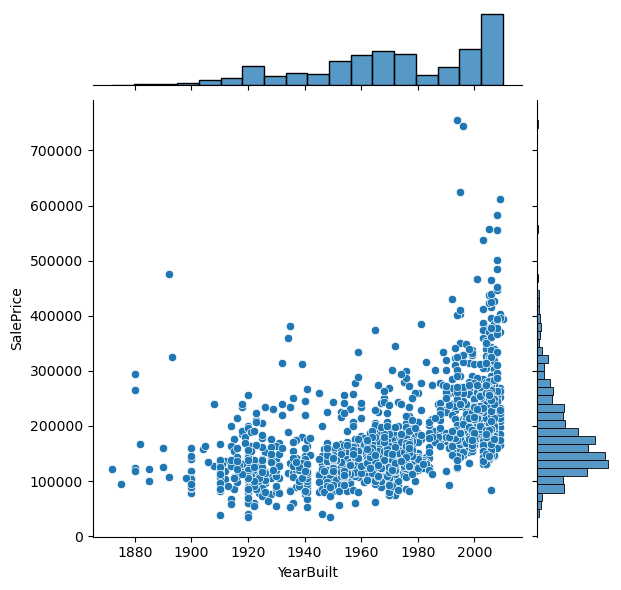

In [7]:
# График зависимости даты постройки дома и его стоимости

sns.jointplot( x=df["YearBuilt"], y=df['SalePrice'])
plt.xlabel("Year Built")
plt.ylabel("Sale Price")
plt.show()


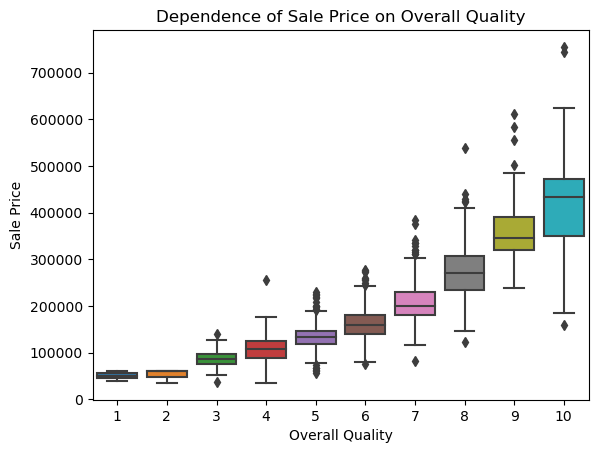

In [8]:
# График зависимости "качества дома и материалов" и его стоимости

sns.boxplot( x=df["OverallQual"], y=df["SalePrice"])
plt.xlabel("Overall Quality")
plt.ylabel("Sale Price")
plt.title("Dependence of Sale Price on Overall Quality")
plt.show()

C:\Users\Алёна\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:64: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout(*args, **kwargs)


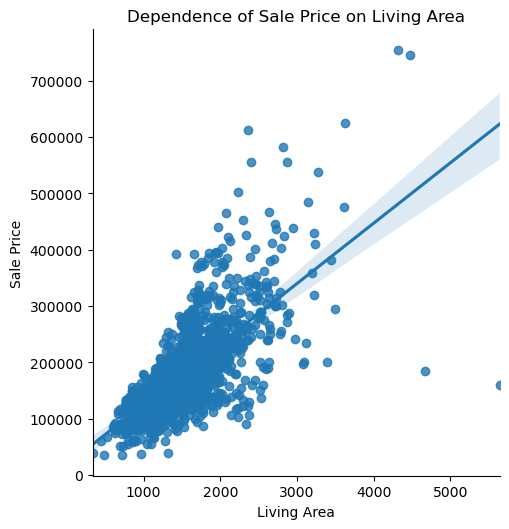

In [9]:
# График зависимости площади дома и его стоимости

sns.lmplot(data=df, x="GrLivArea", y="SalePrice")
plt.xlabel("Living Area")
plt.ylabel("Sale Price")
plt.title("Dependence of Sale Price on Living Area")
plt.show()

## 1.2 Heatmap (3 балла)

Судя по предыдущим графикам, есть некоторые линейные зависимости. Но строить по графику на каждый признак из 80 штук немного долго и не наглядно. Постройте красивый график корреляции всех признаков. Используйте цвета `RdYlGn`, так будет нагляднее. Не забудьте применить маску, чтобы убрать дублирующую половину матрицы.

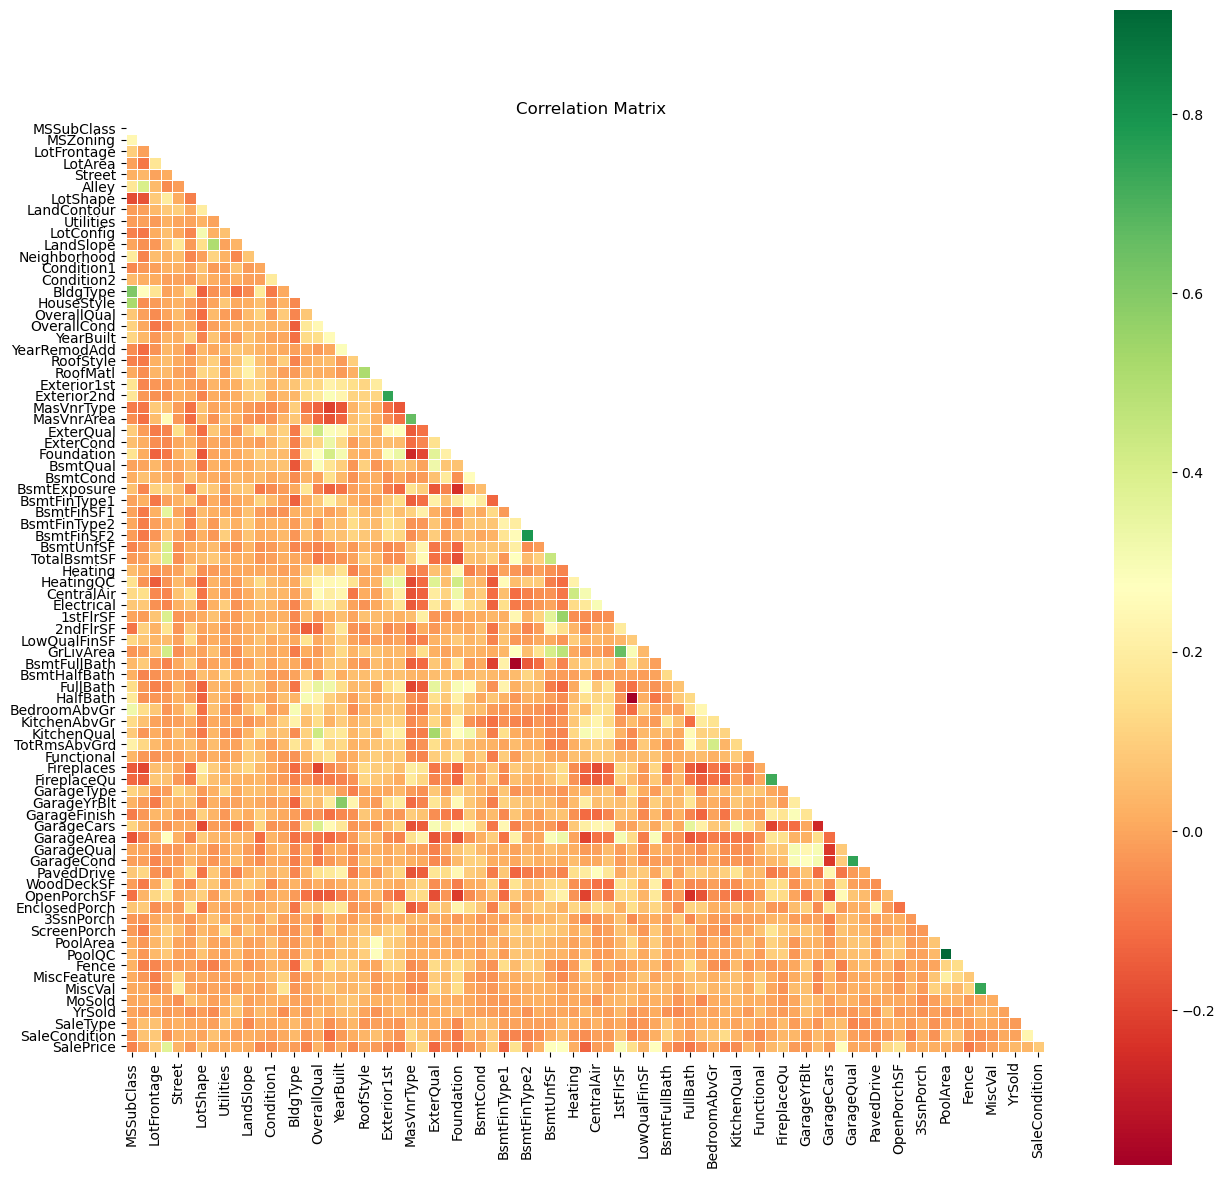

In [10]:
encoded_df = df.apply(lambda x: pd.factorize(x)[0])
corr = encoded_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(15, 15))
sns.heatmap(corr, mask=mask, cmap='RdYlGn', square=True, linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

Большая матрица 38x38 ячеек. И мы видим, там есть сильно коррелируемые объекты с нашей целевой переменной. 

- Нарисуйте крупно heatmap этих сильно коррелируемых объектов( больше 0.5 по абсолютному значению) и сделайте так, чтобы в каждой ячейке было значение корреляции. 
- Выведите список этих сильно коррелируемых признаков.
- Желательно сделать heatmap диагональной матрицей, чтобы было красиво (в теории был пример)

Запомним эти признаки!

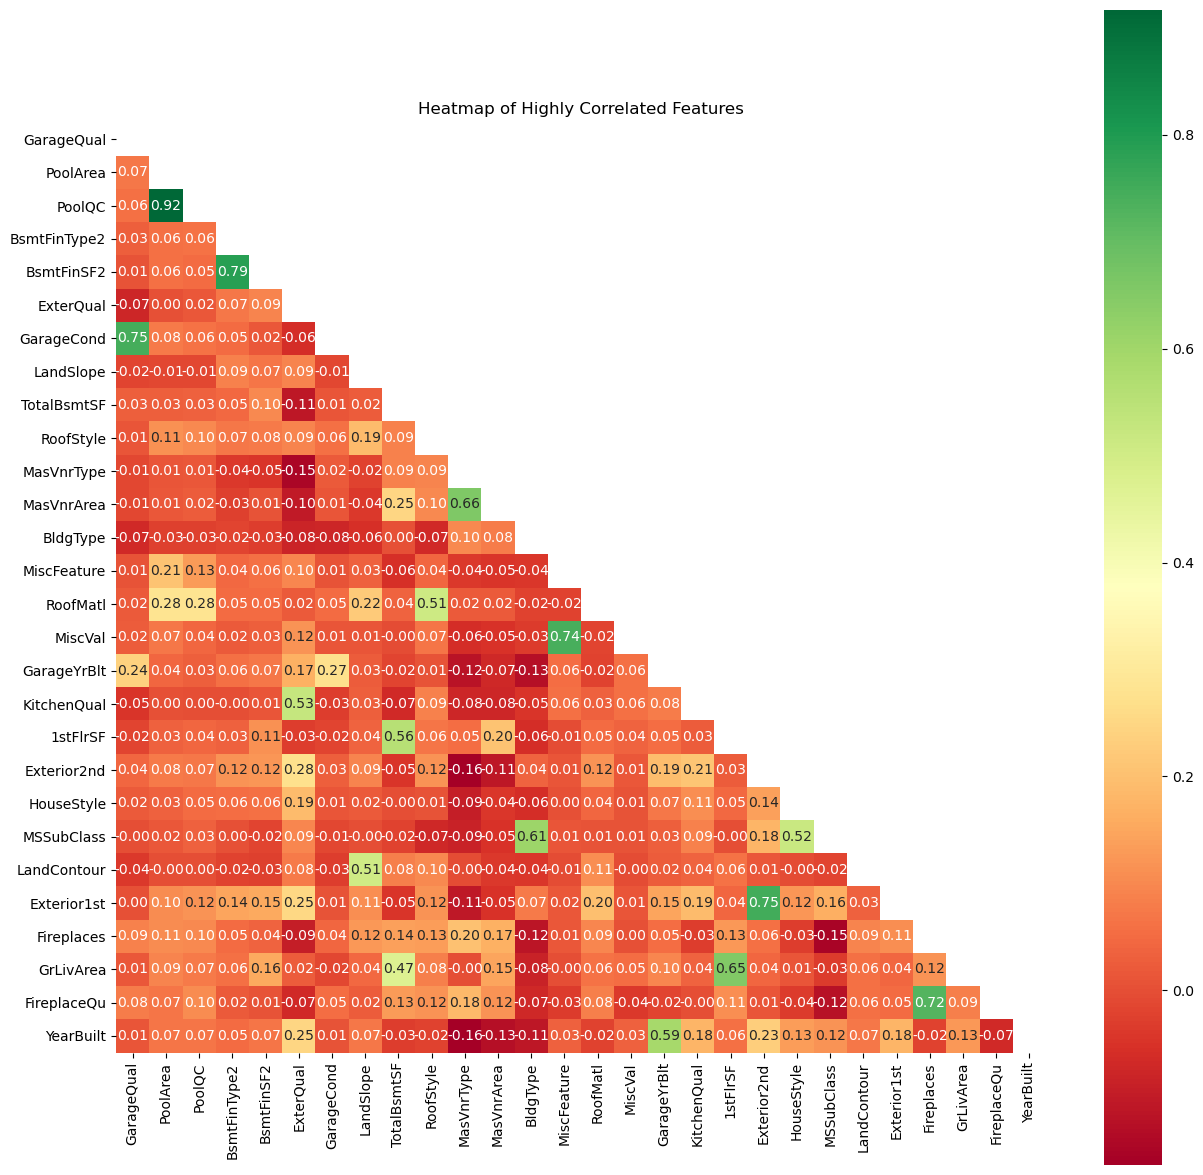

Highly Correlated Features: ['GarageQual', 'PoolArea', 'PoolQC', 'BsmtFinType2', 'BsmtFinSF2', 'ExterQual', 'GarageCond', 'LandSlope', 'TotalBsmtSF', 'RoofStyle', 'MasVnrType', 'MasVnrArea', 'BldgType', 'MiscFeature', 'RoofMatl', 'MiscVal', 'GarageYrBlt', 'KitchenQual', '1stFlrSF', 'Exterior2nd', 'HouseStyle', 'MSSubClass', 'LandContour', 'Exterior1st', 'Fireplaces', 'GrLivArea', 'FireplaceQu', 'YearBuilt']


In [11]:
corr_df = encoded_df.corr().abs()
high_corr_var = np.where(corr_df > 0.5)
high_corr_pairs = [(corr_df.index[x], corr_df.columns[y]) for x, y in zip(*high_corr_var) if x != y and x < y]

high_corr_df = encoded_df[list(set(x for pair in high_corr_pairs for x in pair))]
corr = high_corr_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(15,15))
sns.heatmap(high_corr_df.corr(), mask = mask, annot=True, cmap='RdYlGn', square=True, fmt='.2f', 
            xticklabels=True, yticklabels=True)
plt.title('Heatmap of Highly Correlated Features')
plt.show()

high_corr_features = list(set(x for pair in high_corr_pairs for x in pair))
print("Highly Correlated Features:", high_corr_features)

## 1.3 Пропущеные данные (3 балла)

Задание:
 - Посчитайте общее количество пропущенных данных по каждому признаку
 - посчитайте долю пропущенных данных выборки
 - удалите из выборки признаки, доля пропущенных которых больще 10%
 - пропущенные категориальные заполните словом 'unknown' (у них dtype object)
 - пропущенные числовые заполните средним (у них dtype float)

Hinst: https://stackoverflow.com/a/38134049/3205200

In [12]:
missing_values_count = df.isnull().sum()
print("Общее количество пропущенных данных по каждому признаку:\n", missing_values_count)

total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()
missing_ratio = (total_missing / total_cells) * 100
print("Доля пропущенных данных выборки: {:.2f} %".format(missing_ratio))

missing_percentages = (df.isnull().sum() / df.shape[0]) * 100
missing_features = list(missing_percentages[missing_percentages > 10].index)
df = df.drop(columns=missing_features)
print("Признаки, доля пропущенных которых больше 10%:", missing_features)

categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna('unknown')

numeric_columns = df.select_dtypes(include=['float']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

df

Общее количество пропущенных данных по каждому признаку:
 MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64
Доля пропущенных данных выборки: 6.70 %
Признаки, доля пропущенных которых больше 10%: ['LotFrontage', 'Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,0,0,0,0,0,8,2007,WD,Normal,175000
1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,0,0,0,0,0,2,2010,WD,Normal,210000
1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,0,0,0,0,2500,5,2010,WD,Normal,266500


## 1.4 Категориальные переменные (1 балл)

На сколько вы помните, линейная регрессия не умеет обрабатывать категориальные признаки, так как ей нужны ЧИСЛА. Но не беда, в pandas есть встроенная функция [get_dummies](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Задание:
- сконвертируйте все категориальные признаки(dtype=object) в вектора числовых с помощью get_dummies
- напечатайте сколько у вас теперь признаков
- Положите в переменную X все данные из датасета, кроме целевой переменной. Положите в переменную y только целевую переменную.

In [13]:
df = pd.get_dummies(df, columns=df.select_dtypes(include=['object']).columns)
print("Number of Features:", len(df.columns))

Number of Features: 276


In [14]:
X = df.drop(columns=['SalePrice'])
y = df['SalePrice']

## 1.5 Переобучение (3 балла)

Обучим обычную модель без регуляризации [sklearn.linear_model.LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

- Выведите все коэффициенты для каждого признака, отсортировав по возрастанию по модулю значения коэффициента. Используйте print и for, иначе jupyter схлопнет вывод numpy массива. Можете округлить коэффициенты до 2 знаков после запятой.
- Выведите **среднее** ошибки предсказания на 5 фолдах (cv=5) для этой линейной регрессии с помощью функции [sklearn.model_selection.cross_val_score](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html). Укажите `scoring='neg_mean_squared_error'`, чтобы считалась [MSE](http://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error)

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

model = LinearRegression()
model.fit(X, y)

print("Коэффициенты признаков отсортированные по возрастанию модуля")

coef = model.coef_
sorted_coef_index = sorted(range(len(coef)), key=lambda k: abs(coef[k]))
for i in sorted_coef_index:
    print(f"{X.columns[i]}: {coef[i]:.2f}")

print("Cреднее значение ошибки предсказания на 5 фолдах")
mse_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
mse_scores = -mse_scores  
print("Mean MSE:", mse_scores.mean())

Коэффициенты признаков отсортированные по возрастанию модуля
MiscVal: 0.12
LotArea: 0.76
BsmtUnfSF: -1.92
OpenPorchSF: 2.53
EnclosedPorch: 4.41
BsmtFinSF2: 7.02
WoodDeckSF: 13.41
MasVnrArea: 13.43
1stFlrSF: 15.37
BsmtFinSF1: 17.42
GarageArea: 18.38
LowQualFinSF: -19.53
MSSubClass: -19.79
TotalBsmtSF: 22.52
ScreenPorch: 28.59
GarageYrBlt: -30.18
GrLivArea: 31.15
CentralAir_N: -31.17
CentralAir_Y: 31.17
3SsnPorch: 31.41
2ndFlrSF: 35.32
Functional_Mod: 84.63
PoolArea: 85.11
YearRemodAdd: 100.63
GarageFinish_Unf: -129.43
Exterior2nd_Brk Cmn: -135.86
GarageFinish_Fin: -232.59
YearBuilt: 316.05
GarageType_BuiltIn: -321.41
YrSold: -328.28
Exterior2nd_Wd Shng: 399.51
Heating_Grav: -399.90
Neighborhood_Blmngtn: 421.54
LandContour_Bnk: -428.95
MoSold: -446.94
PavedDrive_N: 580.60
BsmtFullBath: 603.67
BsmtFinType1_Unf: 620.33
PavedDrive_Y: 663.74
GarageType_Attchd: 765.14
BsmtFinType1_BLQ: -836.53
HalfBath: 850.27
HeatingQC_Fa: 865.76
BsmtHalfBath: -922.79
Exterior1st_CemntBd: -961.55
Neighborhoo

К счастью в этот раз коэффициенты при признаках не улетели в космос, но всё равно достигли очень больших значений. Например `RoofStyle_Shed` получился в моем случае около `-514961`. А у некоторых признаков коэффициент уже равен 0, хотя не была применена регуляризация.

## 1.6 Ridge и Lasso (4 балла)

- Обучите Lasso и Ridge для разных значений регуляризации alpha
- нарисуйте график значений коэффициентов модели для каждого признака, как мы делали на практике. По оси X будет значение alpha, по Y - значение коэффициента. на графике будет "радуга" из линий разных цветов(линий столько, сколько признаков).
- Нарисуйте гистограмму, в которой по оси Y будет количество коэффициентов, равных 0 (<0.0001) для Loss регресиии, а по оси X - значение коэффициента альфа.

alpha взять от 1 до 500 с каким-нибудь шагом. Но не переборщите, а то долго будете ждать.

In [16]:
from sklearn.linear_model import Lasso, Ridge

In [17]:
alphas = np.arange(1, 501, 10)

lasso_coefs = []
ridge_coefs = []


for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X, y)
    lasso_coefs.append(lasso.coef_)
    
    ridge = Ridge(alpha=alpha)
    ridge.fit(X, y)
    ridge_coefs.append(ridge.coef_)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.722e+11, tolerance: 9.208e+08
  model = cd_fast.enet_coordinate_descent(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.396e+10, tolerance: 9.208e+08
  model = cd_fast.enet_coordinate_descent(


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


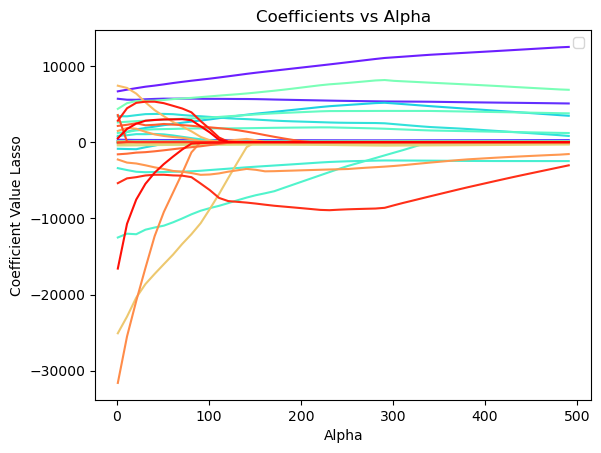

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


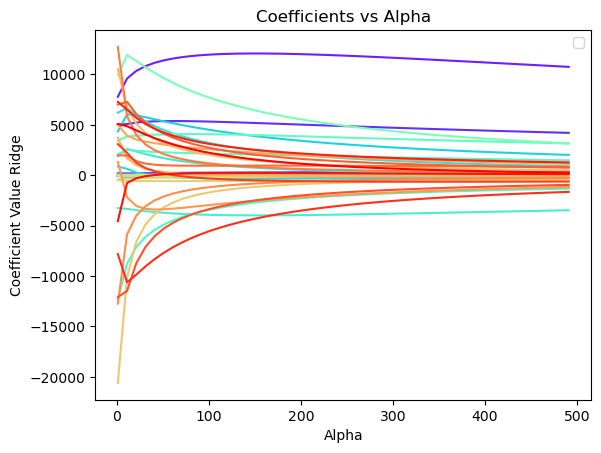

In [18]:

colors = plt.cm.rainbow(np.linspace(0, 1, len(lasso_coefs)))
for i, color in enumerate(colors):
    plt.plot(alphas, [coef[i] for coef in lasso_coefs], color=color)

plt.xlabel('Alpha')
plt.ylabel('Coefficient Value Lasso')
plt.title('Coefficients vs Alpha')
plt.legend(loc='upper right')
plt.show()

for i, color in enumerate(colors):
    plt.plot(alphas, [coef[i] for coef in ridge_coefs], color=color)
plt.xlabel('Alpha')
plt.ylabel('Coefficient Value Ridge')
plt.title('Coefficients vs Alpha')
plt.legend(loc='upper right')
plt.show()

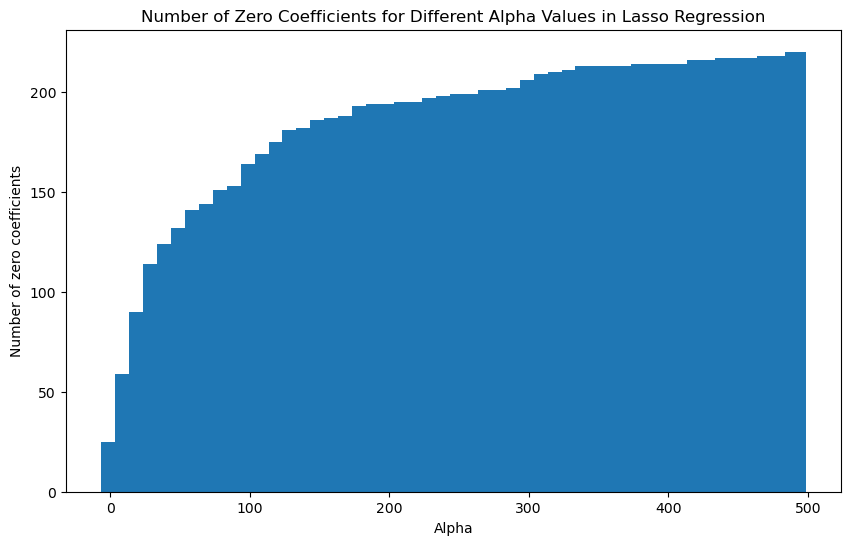

In [19]:
num_zero_coefs = [np.sum(np.abs(coef) < 0.0001) for coef in lasso_coefs]

plt.figure(figsize=(10, 6))
plt.bar(alphas, num_zero_coefs, width=15, align='center')
plt.xlabel('Alpha')
plt.ylabel('Number of zero coefficients')
plt.title('Number of Zero Coefficients for Different Alpha Values in Lasso Regression')
plt.show()

## 1.7 Поиск оптимального alpha (6 баллов)

- С помощью метода LassoCV найдите оптимальное значение alpha и напечатайте его, используя разбиение на 5 фолда в кроссвалидации (`cv=5`).
- Нарисуйте график зависимости MSE от alpha (`mse_path_`).
- Нарисуйте длинную гистограмму магнитуда признаков, как в классе, на которой будет показано значение коэффициента для каждого признака. Графк должен быть остортирован по величине коэффициентов. Признаки с нулевыми коэффициентами должны быть удалены.
- Сколько в итоге ненулевых признаков осталось?
- Выведите **среднее** ошибки предсказания на 5 фолдах (cv=5) для этой линейной регрессии с помощью функции [sklearn.model_selection.cross_val_score](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html). Укажите `scoring='neg_mean_squared_error'`, чтобы считалась [MSE](http://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error). Качество должно быть лучше, чем у простой линейной регрессии.

In [20]:
from sklearn.linear_model import LassoCV

lasso = LassoCV(cv=5)
lasso.fit(X, y)

optimal_alpha = lasso.alpha_
print("Оптимальное значение alpha:", optimal_alpha)

Оптимальное значение alpha: 209067.7746829921


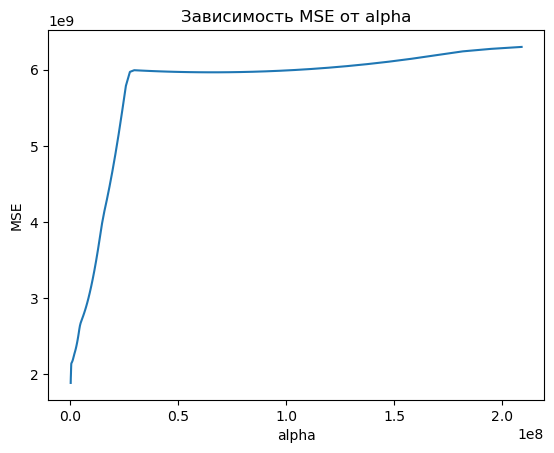

In [21]:
mse_path = lasso.mse_path_
plt.plot(lasso.alphas_, mse_path.mean(axis=1))
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.title('Зависимость MSE от alpha')
plt.show()

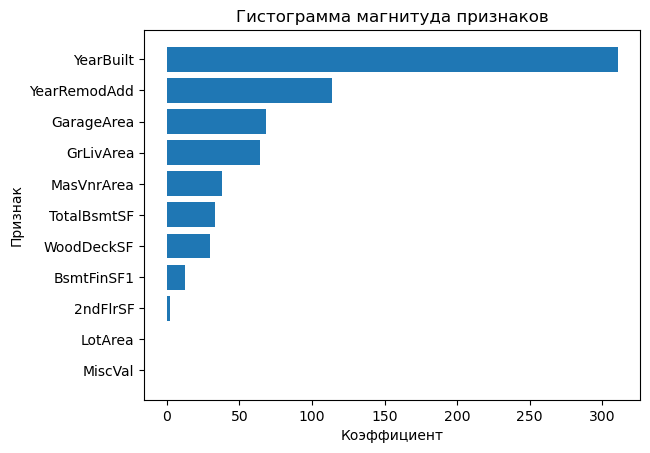

Количество ненулевых признаков: 11


In [22]:
coef = lasso.coef_
df_coef = pd.DataFrame({'Признак': X.columns, 'Коэффициент': coef})
df_coef = df_coef[df_coef['Коэффициент'] != 0]  # Удаление признаков с нулевыми коэффициентами
df_coef = df_coef.sort_values(by='Коэффициент')  # Сортировка по величине коэффициентов
plt.barh(df_coef['Признак'], df_coef['Коэффициент'])
plt.xlabel('Коэффициент')
plt.ylabel('Признак')
plt.title('Гистограмма магнитуда признаков')
plt.show()

num_nonzero_features = len(df_coef)
print("Количество ненулевых признаков:", num_nonzero_features)

In [23]:
mse_scores = cross_val_score(lasso, X, y, scoring='neg_mean_squared_error', cv=5)
mean_mse = -mse_scores.mean()
print("Среднее значение MSE на 5 фолдах:", mean_mse)

Среднее значение MSE на 5 фолдах: 1885748973.7168381


## 1.8 Предсказание на отложенной выборке (3 балла)

- Используя [sklearn.model_selection.train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) разбейте датасет на 2 части - тренировочную и тестовую в соотношении 0.33. Не забудьте перемешать!
- Напечатайте размерность X_train и X_test

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=42)

In [25]:
X_train

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
616,85,8800,6,7,1963,1963,156.0,763,0,173,...,False,False,False,True,True,False,False,False,False,False
614,20,8402,5,5,2007,2007,0.0,206,0,914,...,False,True,False,False,False,False,False,False,False,True
1304,20,8688,7,5,2005,2005,228.0,0,0,1616,...,False,False,False,True,False,False,False,False,True,False
487,20,10289,5,7,1965,1965,168.0,836,0,237,...,False,False,False,True,False,False,False,False,True,False
562,20,10010,5,5,1974,1975,0.0,1071,123,195,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,20,9317,6,5,2006,2006,0.0,24,0,1290,...,False,False,False,True,False,False,False,False,True,False
1131,50,7804,4,3,1928,1950,0.0,622,0,500,...,False,False,False,True,False,False,False,False,True,False
1295,20,8172,5,7,1955,1990,0.0,167,0,697,...,False,False,False,True,False,False,False,False,True,False


In [26]:
X_test

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
893,20,8414,6,8,1963,2003,0.0,663,0,396,...,False,False,False,True,False,False,False,False,True,False
1106,60,12256,8,5,1994,1995,362.0,1032,0,431,...,False,False,False,True,False,False,False,False,True,False
414,30,8960,5,6,1927,1950,0.0,0,0,1008,...,False,False,False,True,False,False,False,False,True,False
523,50,5000,6,7,1947,1950,0.0,399,0,605,...,False,False,False,True,False,False,False,False,True,False
1037,20,12898,9,5,2007,2008,70.0,1022,0,598,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011,50,21286,5,5,1948,1950,0.0,0,0,720,...,False,False,False,True,False,False,False,False,True,False
391,50,8405,5,8,1900,1950,0.0,241,391,229,...,False,False,False,True,False,False,False,False,True,False
1410,60,20544,7,6,1986,1991,123.0,0,0,791,...,False,False,False,True,False,False,False,False,True,False


Теперь, возьмите вашу самую мощную модель(не тренированную!). Запустите её тренировку по тренировочной выборке X_train, y_train с помощью функции `fit`. Постройте предсказания с помощью функции `predict`.

In [27]:
model = Lasso()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.394e+11, tolerance: 5.669e+08
  model = cd_fast.enet_coordinate_descent(


Визуализируйте scatter plot предсказанных значений и настоящих (`y_test`). У вас должен получиться график, точки которого расположены приблизительно вдоль некоторой прямой с разбросом. Идеальный предсказатель будет выглядить как набор точек вдоль прямой без разброса.

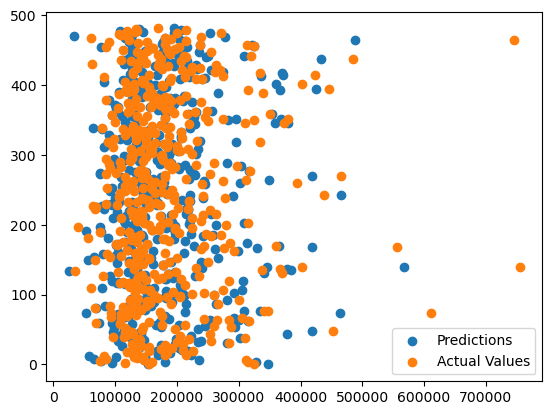

In [28]:
indices = np.arange(len(y_pred))

plt.scatter(y_pred, indices, label='Predictions')
plt.scatter(y_test, indices,  label='Actual Values')
plt.legend()
plt.show()

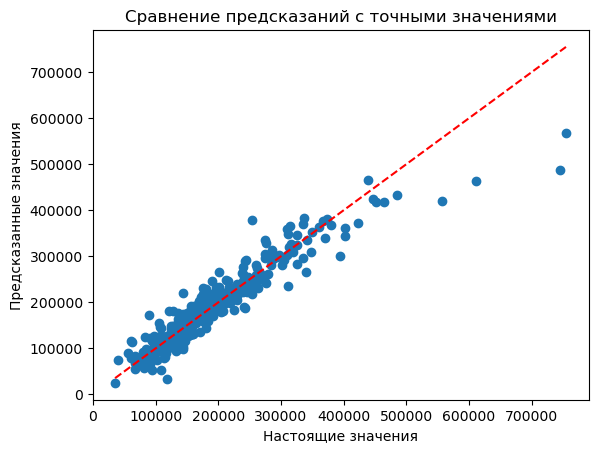

In [29]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Настоящие значения')
plt.ylabel('Предсказанные значения')
plt.title('Сравнение предсказаний с точными значениями')
plt.show()

## 1.9 Ограниченная версия ( 4 балла)

Помните в самом начале мы оставили очень мало признаков по данным из heatmap. Настало время проверить как он себя покажет! К счастью они все сразу числовые, а не категориальные. Переиспользуйте тот дадасет, где вы уже поборолись с пропусками.
Снова выделите отдельно X и y и запустите кроссвалидацию c 5 фолдами по Lasso с `alpha=1`.

In [30]:
X = df.drop(columns=['SalePrice'])
y = df['SalePrice']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=42)

In [32]:
lasso = Lasso(alpha=1)

scores = cross_val_score(lasso, X, y, cv=5, scoring='neg_mean_squared_error')

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.531e+11, tolerance: 7.592e+08
  model = cd_fast.enet_coordinate_descent(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.594e+10, tolerance: 7.288e+08
  model = cd_fast.enet_coordinate_descent(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.940e+11, toleranc

In [33]:
print("Cross-validated Lasso scores:", scores)

Cross-validated Lasso scores: [-5.86616917e+08 -1.14675340e+09 -1.37250908e+09 -5.68715216e+08
 -2.10479584e+09]


Можете посмотреть еще много разных примеров обработки этого датасета тут: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/kernels

А суть всего этого такова, что в итоге надо кучу времени потратить на подготовку признаков. Смотреть на кучу графиков а потом стакать модели.